In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import simplefilter

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

simplefilter("ignore")

### Reading Data 

In [2]:
start_up = pd.read_csv("Startup_Data.csv")
start_up.head()

,state_code,latitude,longitude,zip_code,id,city,Complete address,name,founded_at,closed_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,01-01-2007,NaN,...,c:6669,0,1,0,0,0,0,1.0000,0,1
1,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,01-01-2000,NaN,...,c:16283,1,0,0,1,1,1,4.7500,1,1
2,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,...,c:65620,0,0,1,0,0,0,4.0000,1,1
3,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,01-01-2002,NaN,...,c:42668,0,0,0,1,1,1,3.3333,1,1
4,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,08-01-2010,10-01-2012,...,c:65806,1,1,0,0,0,0,1.0000,1,0


### Checking null values in data 

In [3]:
start_up.isnull().sum()

state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Complete address              0
name                          0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_adver

### Dropping columns 

In [4]:
start_up = start_up.drop(["closed_at", "id"], axis=1)



### Filling missing values in the data set

In [5]:
start_up["age_first_milestone_year"] = start_up["age_first_milestone_year"].fillna(method="ffill")
start_up["age_last_milestone_year"] = start_up["age_last_milestone_year"].fillna(method="ffill")

start_up["state_code.1"] = start_up["state_code.1"].fillna(method="ffill")

In [6]:
start_up.isnull().sum()

state_code                  0
latitude                    0
longitude                   0
zip_code                    0
city                        0
Complete address            0
name                        0
founded_at                  0
first_funding_at            0
last_funding_at             0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
state_code.1                0
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
category_code               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommerce                0
is_biotech                  0
is_consult

In [7]:
start_up.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_code                923 non-null    object 
 1   latitude                  923 non-null    float64
 2   longitude                 923 non-null    float64
 3   zip_code                  923 non-null    object 
 4   city                      923 non-null    object 
 5   Complete address          923 non-null    object 
 6   name                      923 non-null    object 
 7   founded_at                923 non-null    object 
 8   first_funding_at          923 non-null    object 
 9   last_funding_at           923 non-null    object 
 10  age_first_funding_year    923 non-null    float64
 11  age_last_funding_year     923 non-null    float64
 12  age_first_milestone_year  923 non-null    float64
 13  age_last_milestone_year   923 non-null    float64
 14  relationsh

In [8]:
Start_up_Dummy = pd.get_dummies(start_up, columns=['state_code', 'zip_code', 'city', 'Complete address', 'name', 
                                                   'founded_at', 'founded_at','first_funding_at', 'last_funding_at', 
                                                   'state_code.1', 'category_code', 'object_id'  ])
Start_up_Dummy.head()

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,...,object_id_c:9669,object_id_c:967,object_id_c:971,object_id_c:9730,object_id_c:975,object_id_c:9772,object_id_c:9782,object_id_c:9816,object_id_c:9822,object_id_c:997
0,42.358880,-71.056820,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,...,0,0,0,0,0,0,0,0,0,0
1,37.238916,-121.973718,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,...,0,0,0,0,0,0,0,0,0,0
2,32.901049,-117.192656,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,...,0,0,0,0,0,0,0,0,0,0
3,37.320309,-122.050040,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,...,0,0,0,0,0,0,0,0,0,0
4,37.779281,-122.419236,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:

corr_matrix=Start_up_Dummy.corr()
corr_matrix["status"].sort_values(ascending=False)

status                   1.000000
relationships            0.360434
milestones               0.328260
is_top500                0.310652
has_roundB               0.208257
                           ...   
state_code_OH           -0.109463
city_Los Angeles        -0.120150
founded_at_01-01-1999   -0.126536
founded_at_01-01-1999   -0.126536
is_otherstate           -0.169067
Name: status, Length: 4686, dtype: float64

In [10]:
X = Start_up_Dummy.drop(["status"], axis = 1)
X.head()

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,...,object_id_c:9669,object_id_c:967,object_id_c:971,object_id_c:9730,object_id_c:975,object_id_c:9772,object_id_c:9782,object_id_c:9816,object_id_c:9822,object_id_c:997
0,42.358880,-71.056820,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,...,0,0,0,0,0,0,0,0,0,0
1,37.238916,-121.973718,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,...,0,0,0,0,0,0,0,0,0,0
2,32.901049,-117.192656,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,...,0,0,0,0,0,0,0,0,0,0
3,37.320309,-122.050040,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,...,0,0,0,0,0,0,0,0,0,0
4,37.779281,-122.419236,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y = Start_up_Dummy["status"]
y.head()

0    1
1    1
2    1
3    1
4    0
Name: status, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [13]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

LR: 0.646856 (0.041049)
LDA: 0.561080 (0.072009)
KNN: 0.622043 (0.057600)
CART: 0.725877 (0.024921)
RFC: 0.783345 (0.027650)
NB: 0.393315 (0.084423)
SVM: 0.646856 (0.041049)


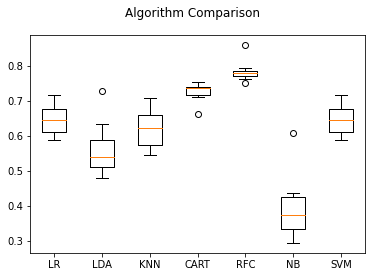

In [14]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [15]:
cls = DecisionTreeClassifier(random_state=7)
cls.fit(x_train,y_train)
y_pred = cls.predict(x_test)

In [16]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.654054054054054
[[30 40]
 [24 91]]
              precision    recall  f1-score   support

           0       0.56      0.43      0.48        70
           1       0.69      0.79      0.74       115

    accuracy                           0.65       185
   macro avg       0.63      0.61      0.61       185
weighted avg       0.64      0.65      0.64       185



# Model 2

In [17]:
corr_matrix=start_up.corr()
corr_matrix["status"].sort_values(ascending=False)

status                      1.000000
relationships               0.360434
milestones                  0.328260
is_top500                   0.310652
has_roundB                  0.208257
funding_rounds              0.206049
age_last_milestone_year     0.192233
avg_participants            0.185992
has_roundA                  0.184307
has_roundC                  0.165902
has_roundD                  0.139940
age_first_milestone_year    0.116857
is_MA                       0.081735
is_CA                       0.077217
is_enterprise               0.073772
age_last_funding_year       0.073731
is_NY                       0.059996
latitude                    0.046560
is_advertising              0.044355
funding_total_usd           0.040176
is_software                 0.012429
is_mobile                   0.007312
is_consulting               0.002373
is_biotech                  0.000104
is_web                     -0.000873
is_gamesvideo              -0.025893
longitude                  -0.036092
i

In [18]:
X1 = start_up[['relationships', 'milestones', 'is_top500', 'has_roundB', 'funding_rounds', 'age_last_milestone_year',
               'avg_participants', 'has_roundA', 'has_roundC', 'has_roundD', 'age_first_milestone_year', 'is_MA', 
               'is_CA', 'is_enterprise', 'age_last_funding_year', 'is_NY', 'latitude', 'is_advertising', 'is_advertising', 
               'funding_total_usd', 'is_software', 'is_mobile', 'is_consulting', 'is_biotech', 'is_biotech', 'is_web',
               'is_gamesvideo', 'longitude', 'is_othercategory', 'is_TX', 'has_VC', 'is_ecommerce', 'has_angel', 
               'age_first_funding_year', 'is_otherstate']]

In [19]:
X1.head()

,relationships,milestones,is_top500,has_roundB,funding_rounds,age_last_milestone_year,avg_participants,has_roundA,has_roundC,has_roundD,...,is_web,is_gamesvideo,longitude,is_othercategory,is_TX,has_VC,is_ecommerce,has_angel,age_first_funding_year,is_otherstate
0,3,3,0,0,3,6.7041,1.0000,0,0,0,...,0,0,-71.056820,1,0,0,0,1,2.2493,0
1,9,1,1,1,4,7.0055,4.7500,0,1,1,...,0,0,-121.973718,0,0,1,0,0,5.1260,0
2,5,2,1,0,1,2.2055,4.0000,1,0,0,...,1,0,-117.192656,0,0,0,0,0,1.0329,0
3,5,1,1,1,3,6.0027,3.3333,0,1,1,...,0,0,-122.050040,0,0,0,0,0,3.1315,0
4,2,1,1,0,2,0.0384,1.0000,0,0,0,...,0,1,-122.419236,0,0,1,0,1,0.0000,0


In [20]:
y = start_up['status']
y.head()

0    1
1    1
2    1
3    1
4    0
Name: status, dtype: int64

LR: 0.646856 (0.041049)
LDA: 0.561080 (0.072009)
KNN: 0.622043 (0.057600)
CART: 0.731288 (0.041562)
RFC: 0.774708 (0.036508)
NB: 0.393315 (0.084423)
SVM: 0.646856 (0.041049)


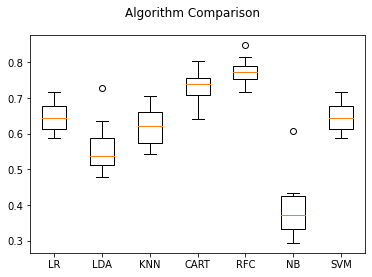

In [21]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [55]:
cls = RandomForestClassifier(random_state=7)
cls.fit(x_train,y_train)
y_pred = cls.predict(x_test)

In [56]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7351351351351352
[[ 26  44]
 [  5 110]]
              precision    recall  f1-score   support

           0       0.84      0.37      0.51        70
           1       0.71      0.96      0.82       115

    accuracy                           0.74       185
   macro avg       0.78      0.66      0.67       185
weighted avg       0.76      0.74      0.70       185



# MODEL 3

In [24]:
X3 = start_up[['relationships', 'milestones', 'is_top500', 'has_roundB', 'funding_rounds', 'age_last_milestone_year',
               'avg_participants', 'has_roundA', 'has_roundC', 'has_roundD', 'age_first_milestone_year', 'is_MA', 
               'is_CA', 'is_enterprise', 'age_last_funding_year', 'is_NY', 'latitude', 'is_advertising', 'is_advertising', 
               'funding_total_usd', 'is_software', 'is_mobile', 'is_consulting', 'is_biotech', 'is_biotech']]

#### standardization on the dataset.

In [26]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
scaled_data = scale.fit_transform(X3) 

In [31]:
y = start_up['status']

### Splitting data into train, test

In [33]:
from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(scaled_data, y, test_size=0.20, random_state=7)

LR: 0.737751 (0.046110)
LDA: 0.723738 (0.041216)
KNN: 0.686898 (0.043728)
CART: 0.705388 (0.033747)
RFC: 0.785531 (0.028222)
NB: 0.598107 (0.094781)
SVM: 0.735671 (0.034873)


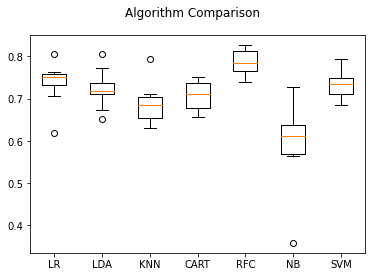

In [43]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, scaled_data, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [52]:
cls = RandomForestClassifier(random_state=7)
cls.fit(x3_train,y3_train)
y_pred = cls.predict(x3_test)

In [54]:
print(accuracy_score(y3_test,y_pred))
print(confusion_matrix(y3_test,y_pred))
print(classification_report(y3_test,y_pred))

0.7621621621621621
[[ 39  34]
 [ 10 102]]
              precision    recall  f1-score   support

           0       0.80      0.53      0.64        73
           1       0.75      0.91      0.82       112

    accuracy                           0.76       185
   macro avg       0.77      0.72      0.73       185
weighted avg       0.77      0.76      0.75       185



# MODEL 4

In [57]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
scaled_data = scale.fit_transform(X1) 

In [58]:
y = start_up['status']

In [59]:
from sklearn.model_selection import train_test_split
x4_train, x4_test, y4_train, y4_test = train_test_split(scaled_data, y, test_size=0.20, random_state=7)

LR: 0.736723 (0.049064)
LDA: 0.730236 (0.042132)
KNN: 0.689107 (0.035125)
CART: 0.707410 (0.032270)
RFC: 0.782293 (0.027983)
NB: 0.608871 (0.080267)
SVM: 0.722674 (0.028889)


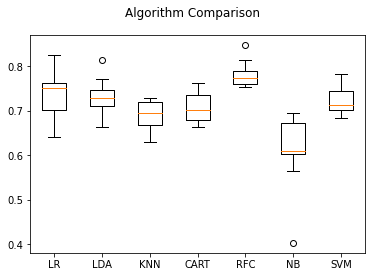

In [60]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, scaled_data, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [61]:
cls = RandomForestClassifier(random_state=7)
cls.fit(x4_train,y4_train)
y_pred = cls.predict(x4_test)

In [62]:
print(accuracy_score(y4_test,y_pred))
print(confusion_matrix(y4_test,y_pred))
print(classification_report(y4_test,y_pred))

0.7783783783783784
[[ 42  31]
 [ 10 102]]
              precision    recall  f1-score   support

           0       0.81      0.58      0.67        73
           1       0.77      0.91      0.83       112

    accuracy                           0.78       185
   macro avg       0.79      0.74      0.75       185
weighted avg       0.78      0.78      0.77       185

